## Introduction

In the past few years the amount of users of social media has grown tremendously. People from around the world can read other people's posts about tips and ideas in a few seconds, including renown celebrities and politicians. The natural question arises: to what extent does these posts from famous people impact a stock price? To delve into our question we will be analyzing tweets from Twitter, currently known as X. 

#### We have to write about how and what models we are going to use to analyze these insights.

For stock information we use data from yfinance.

In [2]:
!pip install yfinance # run this code to be able to access yfinance library.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.2/315.2 kB 2.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.3 MB/s eta 0:00:00ta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 11.2 MB/s eta 0:00:0000:0100:01
  Created wheel for frozendict: filename=frozendict-2.4.1-cp311-cp311-macosx_11_0_arm64.whl size=15504 sha256=2e92d146e89679b044d9f49046562492cbc86a69ad470cc6c15a0276604afd66
  Stored in directory: /Users/camila/Library/Caches/pip/wheels/02/6e/a0/b90b693ddaaf2bde1efb47df2576175a1983aef24936f71694
  Create

In [3]:
!pip install nltk

In [76]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import re
from datetime import datetime
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Some libraries I thought we would need to use.
# Please feel free to add more that are needed

We create a function that cleans the content of the tweet, since there irrelevant information.

In [5]:
# Clean the 'Tweets' column
def clean_tweet(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)
    # Remove special characters, numbers, punctuations (except for the ' character which might be used in words like don't)
    text = re.sub(r"[^a-zA-Z']", " ", text)
    # Remove multiple spaces if any
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [6]:
musk_data = pd.read_csv("elonmusk.csv")

In [7]:
musk_data.head()

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32


In [8]:
musk_data['Date'] = pd.to_datetime(musk_data['Date'])

# Apply the cleaning function to the 'Tweets' column
musk_data['Tweets'] = musk_data['Tweets'].apply(clean_tweet)

# Normalize the text to lowercase
musk_data['Tweets'] = musk_data['Tweets'].str.lower()

musk_data.columns = musk_data.columns.str.lower()

# Make a copy of the data set
musk = musk_data.copy()

# Show the cleaned DataFrame head
musk_data.head()

,tweets,retweets,likes,date
0,thanks,209,7021,2022-10-27 16:17:39
1,absolutely,755,26737,2022-10-27 13:19:25
2,dear twitter advertisers,55927,356623,2022-10-27 13:08:00
3,,802,19353,2022-10-27 02:32:48
4,meeting a lot of cool people at twitter today,9366,195546,2022-10-26 21:39:32


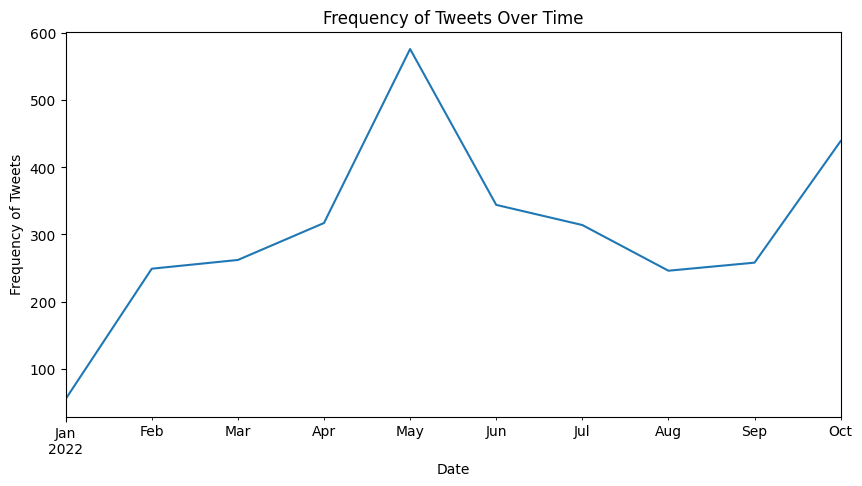

In [9]:
musk_data.set_index('date', inplace=True)

frequency = musk_data.resample('M').size()

plt.figure(figsize=(10,5))
frequency.plot()

plt.xlabel('Date')
plt.ylabel('Frequency of Tweets')
plt.title('Frequency of Tweets Over Time')

plt.show()

In [10]:
trump_data = pd.read_csv("trumptweets.csv")
trump_data.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


We clean the 'trump' data so that it matches the format of 'musk' data. 

In [11]:
trump_data['date'] = pd.to_datetime(trump_data['date'])

# Clean the 'content' column
trump_data['content'] = trump_data['content'].apply(clean_tweet)

# Rename columns
trump_data.rename(columns={'content': 'tweet', 'favorites': 'likes'}, inplace=True)

# Select only the required columns
trump_data = trump_data[['tweet', 'retweets', 'likes', 'date']]

# Copy the data set for future uses.

trump = trump_data.copy()

# Display the cleaned and updated DataFrame
trump_data.head()

,tweet,retweets,likes,date
0,Be sure to tune in and watch Donald Trump on L...,500,868,2009-05-04 20:54:25
1,Donald Trump will be appearing on The View tom...,33,273,2009-05-05 03:00:10
2,Donald Trump reads Top Ten Financial Tips on L...,12,18,2009-05-08 15:38:08
3,New Blog Post Celebrity Apprentice Finale and ...,11,24,2009-05-08 22:40:15
4,My persona will never be that of a wallflower ...,1399,1965,2009-05-12 16:07:28


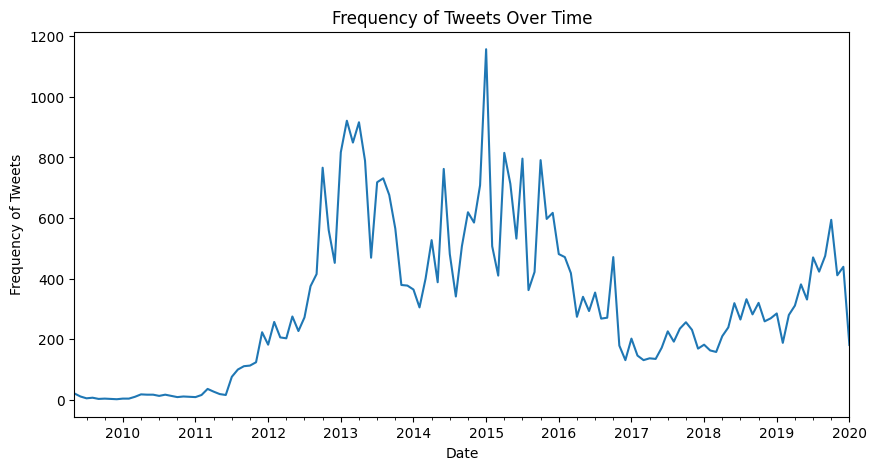

In [12]:
trump_data.set_index('date', inplace=True)

frequency = trump_data.resample('M').size()

plt.figure(figsize=(10,5))
frequency.plot()

plt.xlabel('Date')
plt.ylabel('Frequency of Tweets')
plt.title('Frequency of Tweets Over Time')

plt.show()

Now that we have cleaned the data and observed a visualization, the frequency of tweets, we present the stock and it's history that are related to each person.


#### Write about each person and the stock they are related. What and why would be sufficient.

Since the date range for Donald Trump does not coincide with Trump Media, we use the S&P 500 index for a proxy of Trump's influence.

In [13]:
musk_recent_date = musk['date'].max()
musk_oldest_date = musk['date'].min()

trump_recent_date = trump['date'].max()
trump_oldest_date = trump['date'].min()

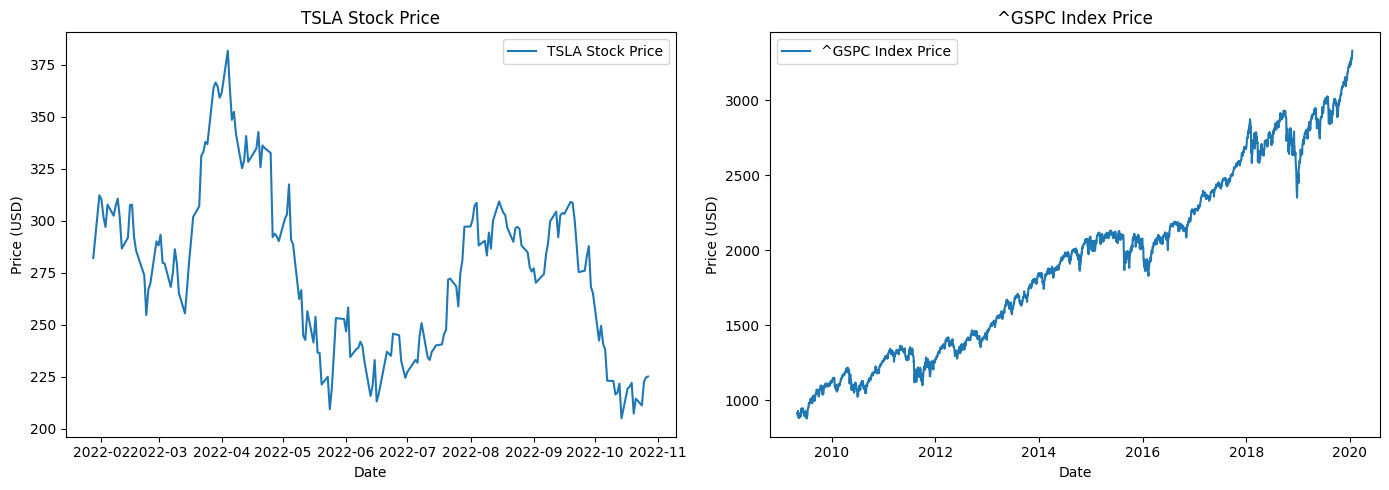

In [14]:
# Define the tickers
musk_ticker = 'TSLA'  # Tesla for Elon Musk
trump_ticker = '^GSPC'  # S&P 500 index as a proxy for Donald Trump

# Fetch the historical stock data
musk_data = yf.Ticker(musk_ticker)
trump_data = yf.Ticker(trump_ticker)

# Get the historical closing prices
musk_df = musk_data.history(period='1d', start=musk_oldest_date, end=musk_recent_date)
trump_df = trump_data.history(period='1d', start=trump_oldest_date, end=trump_recent_date)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot Elon Musk-related stock data
axes[0].plot(musk_df['Close'], label=f'{musk_ticker} Stock Price')
axes[0].set_title(f'{musk_ticker} Stock Price')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()

# Plot Donald Trump-related index data
axes[1].plot(trump_df['Close'], label=f'{trump_ticker} Index Price')
axes[1].set_title(f'{trump_ticker} Index Price')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price (USD)')
axes[1].legend()

# Show the plots side by side
plt.tight_layout()
plt.show()


The range of S&P 500 looks too wide, making it difficult to observe the volatility and impacts. Hence, we shorten the range that coincides with Trump's serving years as the president of the United States. (2017 - 2021)

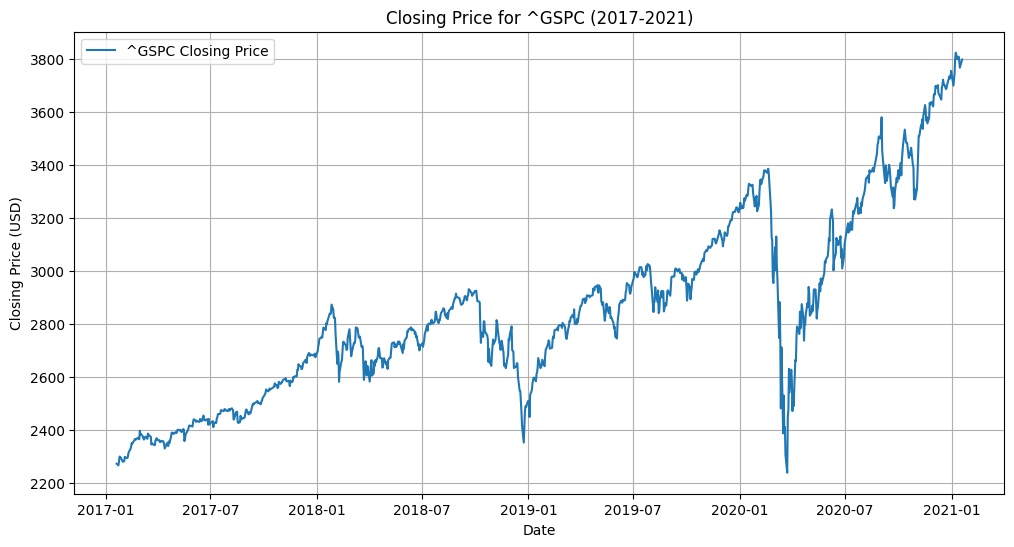

In [15]:
trump_ticker = '^GSPC'  # S&P 500 index as a proxy for Donald Trump
trump_data = yf.Ticker(trump_ticker)
trump_df = trump_data.history(period='1d', start='2017-01-20', end='2021-01-20')


# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(trump_df.index, trump_df['Close'], label=f'{trump_ticker} Closing Price')
plt.title(f'Closing Price for {trump_ticker} (2017-2021)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Now that we have seen that our visualization and data are ready, we start by analyzing the tweets by using sentiment analysis. 

We are going to measure the average monthly sentiment for the tweets and compare it with the monthly stock price. Moreover, try to analyze the impact based on the sentiment score.

In [16]:
# Ensure you've downloaded the VADER lexicon
nltk.download('vader_lexicon')

# Instantiate the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Create a new column for sentiment scores
musk['sentiment'] = musk['tweets'].apply(lambda x: sia.polarity_scores(x)['compound'])
trump['sentiment'] = trump['tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])
# Now, you have sentiment scores for each tweet ranging from -1 (negative) to +1 (positive)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/camila/nltk_data...


In [17]:
musk.head()

,tweets,retweets,likes,date,sentiment
0,thanks,209,7021,2022-10-27 16:17:39,0.4404
1,absolutely,755,26737,2022-10-27 13:19:25,0.0000
2,dear twitter advertisers,55927,356623,2022-10-27 13:08:00,0.3818
3,,802,19353,2022-10-27 02:32:48,0.0000
4,meeting a lot of cool people at twitter today,9366,195546,2022-10-26 21:39:32,0.3182


In [18]:
trump.head()

,tweet,retweets,likes,date,sentiment
0,Be sure to tune in and watch Donald Trump on L...,500,868,2009-05-04 20:54:25,0.4767
1,Donald Trump will be appearing on The View tom...,33,273,2009-05-05 03:00:10,0.7506
2,Donald Trump reads Top Ten Financial Tips on L...,12,18,2009-05-08 15:38:08,0.6115
3,New Blog Post Celebrity Apprentice Finale and ...,11,24,2009-05-08 22:40:15,0.0000
4,My persona will never be that of a wallflower ...,1399,1965,2009-05-12 16:07:28,0.0000


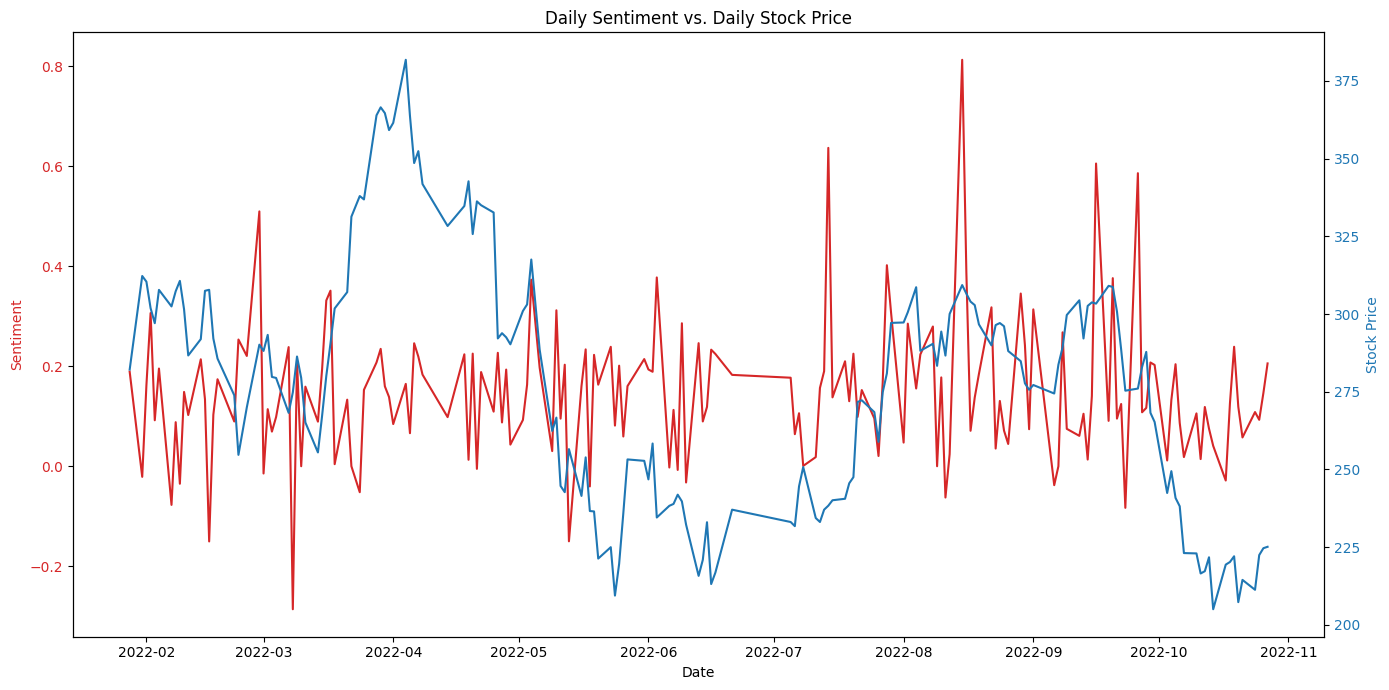

Correlation between daily sentiment and stock price: 0.048321607269304415


In [19]:
# Define the tickers
musk_ticker = 'TSLA'  # Tesla for Elon Musk

# Fetch the historical stock data
musk_data = yf.Ticker(musk_ticker)

# Get the historical closing prices
musk_df = musk_data.history(period='1d', start=musk_oldest_date, end=musk_recent_date)

# Reset the index to turn the date index into a column
musk_df.reset_index(inplace=True)

musk_df['Date'] = musk_df['Date'].dt.tz_localize(None)

# To get rid of the seconds behind the dates
musk['date'] = musk['date'].dt.normalize()

# Since there are several tweets for a single day we compute the daily mean for the sentiment score. 
daily_average_sentiment = musk.groupby('date')['sentiment'].mean().reset_index()


# Now you can merge without the timezone error
combined_data = pd.merge(daily_average_sentiment, musk_df, left_on='date', right_on='Date', how='inner')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color=color)
ax1.plot(combined_data['Date'], combined_data['sentiment'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Stock Price', color=color)  
ax2.plot(combined_data['Date'], combined_data['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show
plt.title('Daily Sentiment vs. Daily Stock Price')
fig.tight_layout()  # to make sure nothing is cut off
plt.show()

# Correlation calculation
correlation = combined_data['sentiment'].corr(combined_data['Close'])
print(f"Correlation between daily sentiment and stock price: {correlation}")

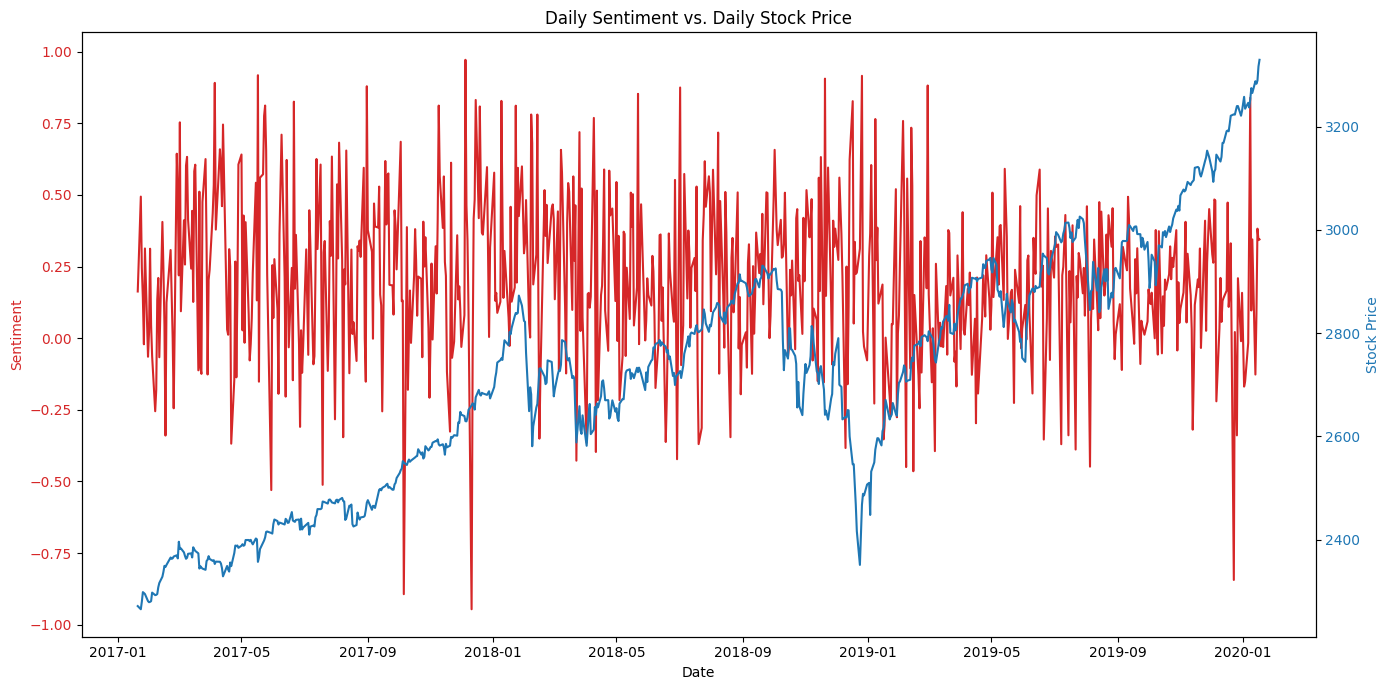

Correlation between daily sentiment and stock price: -0.0877761912923514


In [20]:
# Define the tickers
trump_ticker = '^GSPC'  # S&P 500 index as a proxy for Donald Trump

trump_data = yf.Ticker(trump_ticker)

# Get the historical closing prices
trump_df = trump_data.history(period='1d', start='2017-01-20', end='2021-01-20')

# Reset the index to turn the date index into a column
trump_df.reset_index(inplace=True)

trump_df['Date'] = trump_df['Date'].dt.tz_localize(None)

# Filter the DataFrame for the date range
mask_trump = (trump['date'] >= '2017-01-20') & (trump['date'] <= '2021-01-20')
filtered_trump = trump.loc[mask_trump]
new_trump = filtered_trump.copy()

# To get rid of the seconds behind the dates
new_trump['date'] = new_trump['date'].dt.normalize()

# Since there are several tweets for a single day we compute the daily mean for the sentiment score. 
trump_daily_average_sentiment = new_trump.groupby('date')['sentiment'].mean().reset_index()

# Now you can merge without the timezone error
trump_combined_data = pd.merge(trump_daily_average_sentiment, trump_df, left_on='date', right_on='Date', how='inner')


# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color=color)
ax1.plot(trump_combined_data['Date'], trump_combined_data['sentiment'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Stock Price', color=color)  
ax2.plot(trump_combined_data['Date'], trump_combined_data['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show
plt.title('Daily Sentiment vs. Daily Stock Price')
fig.tight_layout()  # to make sure nothing is cut off
plt.show()

# Correlation calculation
correlation = trump_combined_data['sentiment'].corr(trump_combined_data['Close'])
print(f"Correlation between daily sentiment and stock price: {correlation}")

## **Random Forest Model**

In [73]:
#TRUMP
#daily_average_sentiment = musk.groupby('date')['sentiment'].mean().reset_index()
trump_daily_average_sentiment = new_trump.groupby('date')['sentiment'].mean().reset_index()

# Calculate the daily sum for retweets and likes
daily_sum_retweets = new_trump.groupby('date')['retweets'].sum().reset_index()
daily_sum_likes = new_trump.groupby('date')['likes'].sum().reset_index()

# Merge the daily metrics into a single DataFrame
daily_metrics = trump_daily_average_sentiment.merge(daily_sum_retweets, on='date').merge(daily_sum_likes, on='date')

# Renaming the columns to reflect that retweets and likes are sums
daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes'}, inplace=True)

combined_data = pd.merge(daily_metrics, trump_df, left_on='date', right_on='Date', how='inner')

# Optionally, drop the extra 'Date' column from the stock price dataset if it's redundant
combined_data.drop('Date', axis=1, inplace=True)

#getting target outcome: pct change
combined_data['Perc_Change'] = combined_data['Close'].pct_change() * 100


columns_to_normalize = ['sentiment', 'sum_retweets', 'sum_likes', 'Open', 'High', 'Low', 'Close', 'Volume', 'Perc_Change']

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Replace NaN values in the DataFrame with the mean of their respective columns before normalization
# This step is important because scaling does not work with NaN values
for column in columns_to_normalize:
    combined_data[column] = combined_data[column].fillna(combined_data[column].mean())

# Fit and transform the selected columns with the scaler
combined_data[columns_to_normalize] = scaler.fit_transform(combined_data[columns_to_normalize])

# Check the transformed data
combined_data

,date,sentiment,sum_retweets,sum_likes,Open,High,Low,Close,Volume,Dividends,Stock Splits,Perc_Change
0,2017-01-20,0.578305,0.571343,0.663818,0.002065,0.004896,0.007525,0.005740,0.352176,0.0,0.0,0.458461
1,2017-01-23,0.751004,0.022561,0.045024,0.000000,0.000000,0.000000,0.000000,0.292188,0.0,0.0,0.422743
2,2017-01-24,0.620573,0.105369,0.160494,0.000095,0.012144,0.009097,0.013970,0.396208,0.0,0.0,0.524923
3,2017-01-25,0.565294,0.313883,0.380837,0.019983,0.026245,0.030004,0.031163,0.401299,0.0,0.0,0.541059
4,2017-01-26,0.482254,0.204448,0.262830,0.029217,0.027606,0.034902,0.029575,0.363913,0.0,0.0,0.444325
...,...,...,...,...,...,...,...,...,...,...,...,...
743,2020-01-13,0.427205,0.457136,0.567191,0.950250,0.960542,0.952507,0.961021,0.340000,0.0,0.0,0.529467
744,2020-01-14,0.536049,0.127505,0.183268,0.963718,0.966327,0.960757,0.956342,0.375877,0.0,0.0,0.435723
745,2020-01-15,0.692681,0.494449,0.562749,0.960801,0.970494,0.964053,0.962111,0.381202,0.0,0.0,0.473093
746,2020-01-16,0.671825,0.398223,0.484961,0.980405,0.987931,0.984894,0.987965,0.352763,0.0,0.0,0.544818


In [75]:
#MUSK
#musk_daily_average_sentiment = musk.groupby('date')['sentiment'].mean().reset_index()

# Calculate the daily sum for retweets and likes
musk_daily_sum_retweets = musk.groupby('date')['retweets'].sum().reset_index()
musk_daily_sum_likes = musk.groupby('date')['likes'].sum().reset_index()

# Merge the daily metrics into a single DataFrame
musk_daily_metrics = musk_daily_average_sentiment.merge(musk_daily_sum_retweets, on='date').merge(musk_daily_sum_likes, on='date')

# Renaming the columns to reflect that retweets and likes are sums
musk_daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes'}, inplace=True)

musk_combined_data = pd.merge(musk_daily_metrics, musk_df, left_on='date', right_on='Date', how='inner')

# Optionally, drop the extra 'Date' column from the stock price dataset if it's redundant
musk_combined_data.drop('Date', axis=1, inplace=True)

#getting target outcome: pct change
musk_combined_data['Perc_Change'] = musk_combined_data['Close'].pct_change() * 100

columns_to_normalize = ['sentiment', 'sum_retweets', 'sum_likes', 'Open', 'High', 'Low', 'Close', 'Volume', 'Perc_Change']

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Replace NaN values in the DataFrame with the mean of their respective columns before normalization
# This step is important because scaling does not work with NaN values
for column in columns_to_normalize:
    musk_combined_data[column] = musk_combined_data[column].fillna(musk_combined_data[column].mean())

# Fit and transform the selected columns with the scaler
musk_combined_data[columns_to_normalize] = scaler.fit_transform(musk_combined_data[columns_to_normalize])

# Check the transformed data
musk_combined_data

,date,sentiment,sum_retweets,sum_likes,Open,High,Low,Close,Volume,Dividends,Stock Splits,Perc_Change
0,2022-01-28,0.432297,0.009265,0.013999,0.412651,0.423522,0.399243,0.436171,0.901229,0.0,0.0,0.530997
1,2022-01-31,0.240999,0.037672,0.033736,0.491963,0.580616,0.541737,0.606526,0.606849,0.0,0.0,1.000000
2,2022-02-01,0.407421,0.002325,0.004406,0.612424,0.591760,0.629117,0.596215,0.303307,0.0,0.0,0.507406
3,2022-02-02,0.539103,0.010833,0.019507,0.598874,0.567949,0.597400,0.547975,0.241767,0.0,0.0,0.412751
4,2022-02-03,0.343946,0.012125,0.013807,0.509868,0.578683,0.579314,0.520604,0.358757,0.0,0.0,0.462820
...,...,...,...,...,...,...,...,...,...,...,...,...
168,2022-10-21,0.312678,0.027226,0.032635,0.003469,0.006792,0.031799,0.053442,0.328286,0.0,0.0,0.684042
169,2022-10-24,0.358887,0.006664,0.011569,0.000000,0.000000,0.000000,0.035402,0.568160,0.0,0.0,0.467879
170,2022-10-25,0.344787,0.020824,0.026040,0.024748,0.063528,0.069640,0.098571,0.529958,0.0,0.0,0.764233
171,2022-10-26,0.393623,0.138734,0.115696,0.078521,0.100123,0.119688,0.111126,0.418470,0.0,0.0,0.576607


In [82]:
#Doing Model for Trump 
X = combined_data[['sentiment', 'sum_retweets', 'sum_likes', 'Open', 'High', 'Low', 'Close', 'Volume']]
y = combined_data['Perc_Change']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

#Hyperparameter Tuning:
#Trying both Elon Musk and Donald Trump data together

Mean Absolute Error: 0.06842015572357016
